In [1]:
from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *

In [2]:
df = compile_team_tracking_data("data", "Denmark")
df = extract_one_match(df,1)
np_for_average_position = df.iloc[::120].filter(regex="^home").to_numpy()
averages = np.nanmean(np_for_average_position, axis =1)


In [3]:

ripleys_k_vals = ripley_k_by_indices(df, df.iloc[::120].index)
#ripleys_k_vals = msd_for_dataframe(df, df.iloc[::240].index, 480)

Training with batch size: 100
Input dimensions: 34
Epoch [1/20], Loss: 1775868.875
Epoch [2/20], Loss: 1775680.875
Epoch [3/20], Loss: 1774496.375
Epoch [4/20], Loss: 1775277.375
Epoch [5/20], Loss: 1774773.0
Epoch [6/20], Loss: 1775636.875
Epoch [7/20], Loss: 1775801.625
Epoch [8/20], Loss: 1775563.875
Epoch [9/20], Loss: 1775455.125
Epoch [10/20], Loss: 1775782.0
Epoch [11/20], Loss: 1775750.375
Epoch [12/20], Loss: 1775481.125
Epoch [13/20], Loss: 1775916.125
Epoch [14/20], Loss: 1775307.375
Epoch [15/20], Loss: 1775636.125
Epoch [16/20], Loss: 1775980.375
Epoch [17/20], Loss: 1775007.875
Epoch [18/20], Loss: 1775052.375
Epoch [19/20], Loss: 1775508.0
Epoch [20/20], Loss: 1775951.0
Training with batch size: 500
Input dimensions: 34
Epoch [1/20], Loss: 1768827.0
Epoch [2/20], Loss: 1779815.0
Epoch [3/20], Loss: 1742728.125
Epoch [4/20], Loss: 1744182.375
Epoch [5/20], Loss: 1788796.625
Epoch [6/20], Loss: 1773830.125
Epoch [7/20], Loss: 1778452.625
Epoch [8/20], Loss: 1778788.5
Epoch

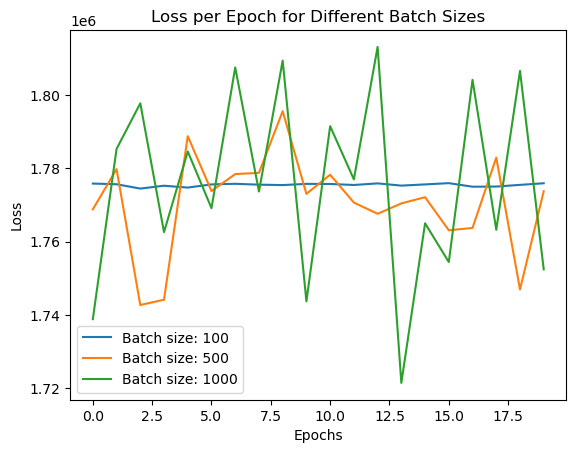

Training with batch size: 1000
Input dimensions: 34
Epoch [1/20], Loss: 1740581.0
Epoch [2/20], Loss: 1756966.25
Epoch [3/20], Loss: 1780841.75
Epoch [4/20], Loss: 1785661.875
Epoch [5/20], Loss: 1761904.375
Epoch [6/20], Loss: 1752958.75
Epoch [7/20], Loss: 1815307.75
Epoch [8/20], Loss: 1759940.125
Epoch [9/20], Loss: 1775042.875
Epoch [10/20], Loss: 1773164.75
Epoch [11/20], Loss: 1795874.5
Epoch [12/20], Loss: 1768213.875
Epoch [13/20], Loss: 1748921.5
Epoch [14/20], Loss: 1769403.75
Epoch [15/20], Loss: 1777072.5
Epoch [16/20], Loss: 1817374.5
Epoch [17/20], Loss: 1739372.5
Epoch [18/20], Loss: 1782290.75
Epoch [19/20], Loss: 1770824.5
Epoch [20/20], Loss: 1805468.5


In [4]:
autoencoder = AutoEncoderObject(ripleys_k_vals)

In [5]:
dim_reduced_rip_k = autoencoder.transform(ripleys_k_vals)

all_features = np.hstack((dim_reduced_rip_k, averages.reshape(len(dim_reduced_rip_k),1)))


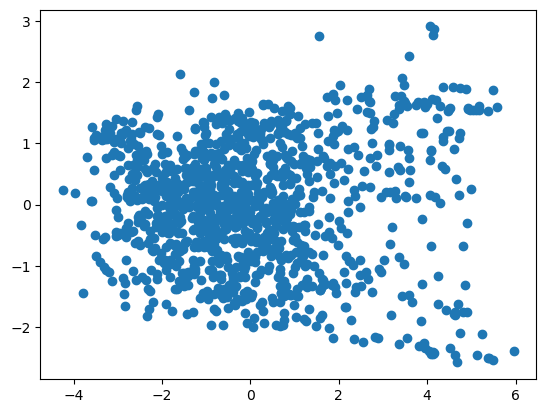

In [6]:
pca_for_AE = PCAObject(all_features, 3).transform(all_features)

plt.scatter(pca_for_AE[:,0], pca_for_AE[:,1])
plt.show()

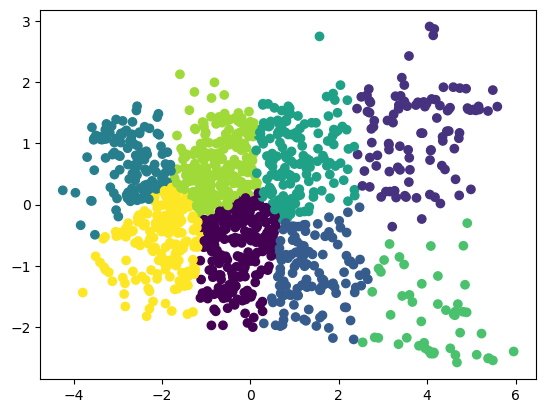

In [8]:
cluster_obj = KMeansObject(pca_for_AE,8)

labels = cluster_obj.get_labels()

plt.scatter(pca_for_AE[:,0], pca_for_AE[:,1],  c = labels)
plt.show()